## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complete this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Helper cutomized function to plot histograms on each feature
import histograms

# sklearn modules to use for KNN and Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [34]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [35]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [36]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [37]:
columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
diabetes_data[columns] = diabetes_data[columns].replace({'0':np.nan, 0:np.nan})

In [38]:
# Sanity check
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

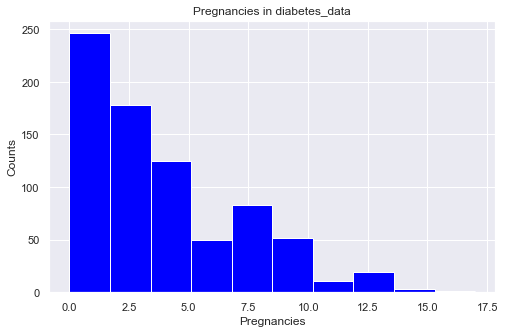

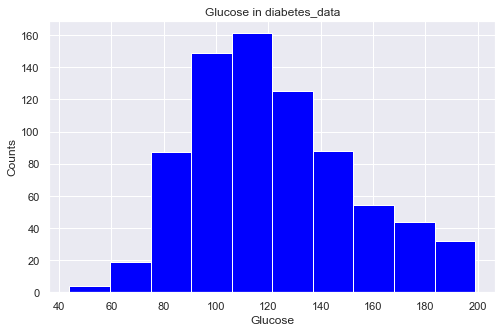

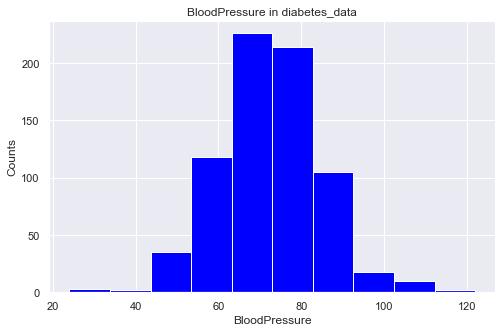

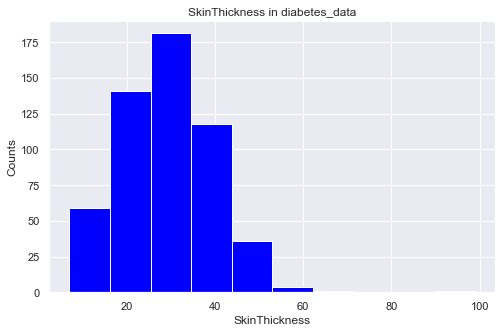

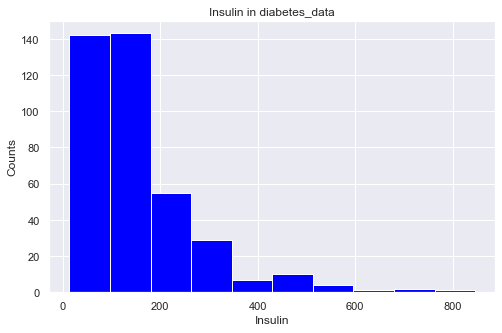

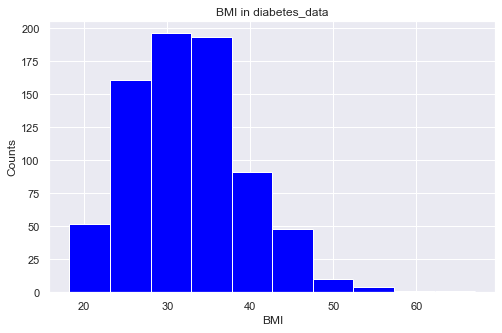

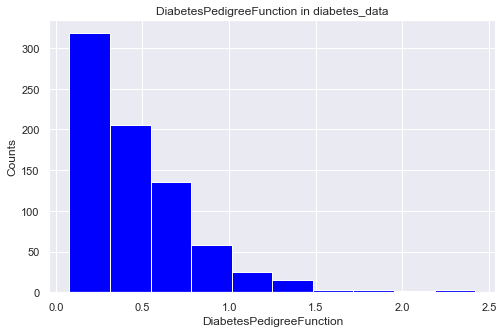

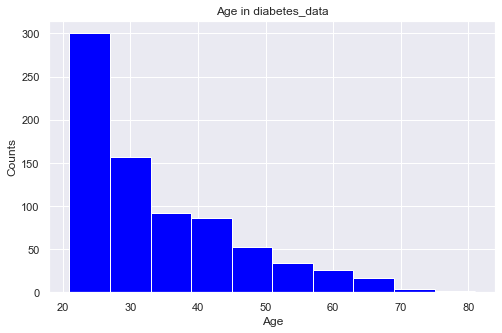

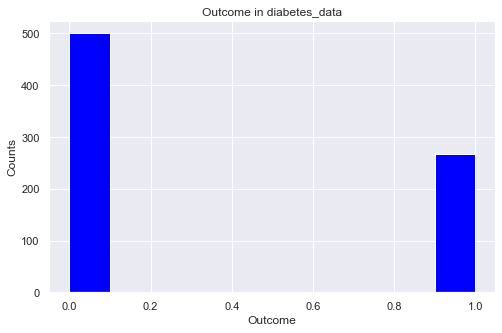

In [39]:
# Plotting histograms with helper function
[histograms.histograms(diabetes_data, i) for i in diabetes_data.columns];

#### Replace the zeros with mean and median values.

In [40]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

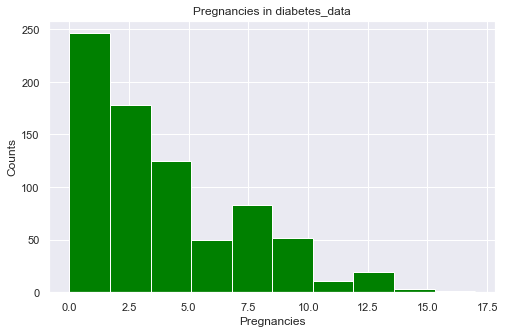

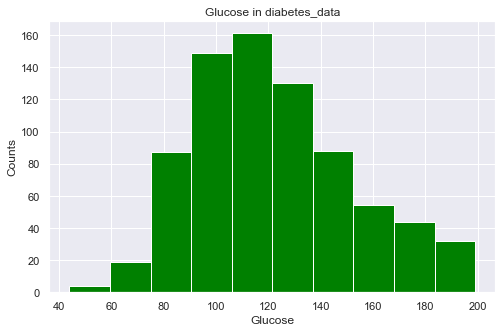

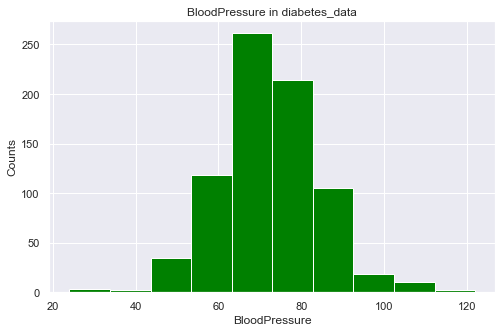

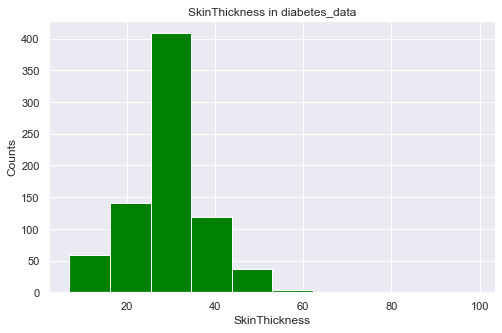

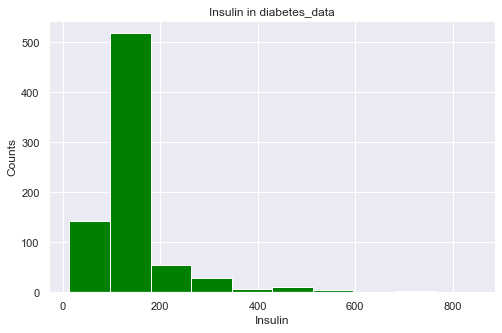

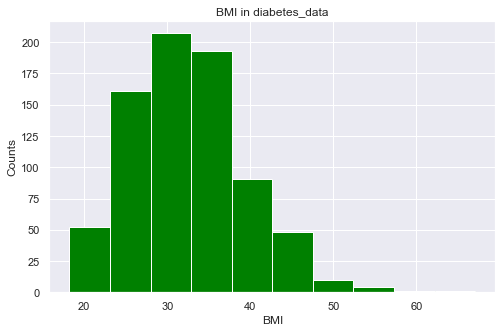

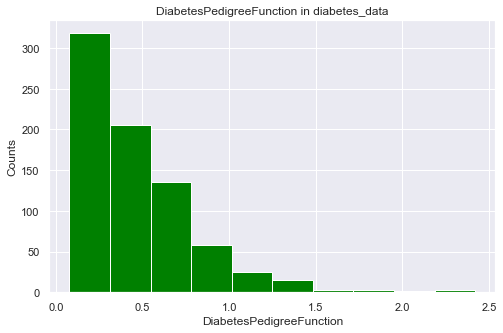

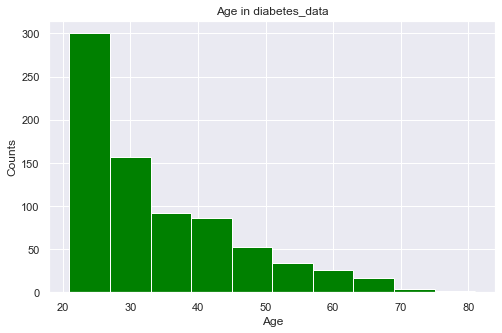

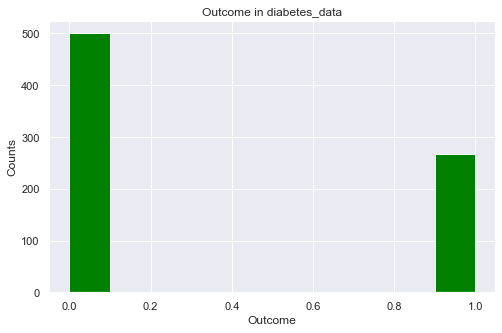

In [41]:
# Plotting histograms with helper function after replacing nan values
[histograms.histograms(diabetes_data, i, 'green') for i in diabetes_data.columns];

#### Plot the correlation matrix heatmap

Correlation between various features


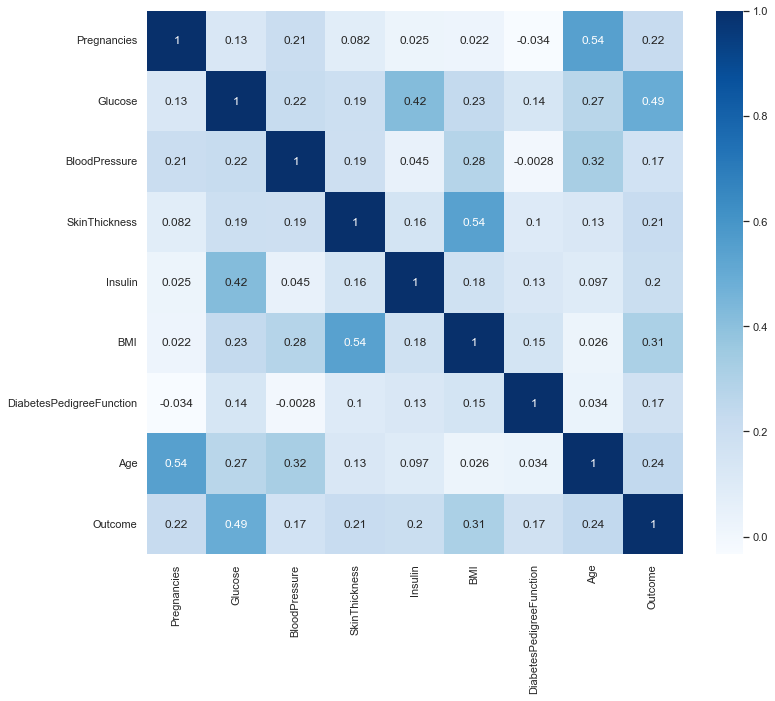

In [42]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [43]:
X, y = diabetes_data.drop(columns='Outcome'), diabetes_data.Outcome

In [44]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**<font color='teal'> Create a 70/30 train and test split. </font>**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [46]:
# Scaling the features: X_scaled
X_scaled = scale(X_train)

# Mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X_train.to_numpy())))
print("Standard Deviation of Unscaled Features: {}".format(np.std(X_train.to_numpy())))
print("")
# Mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 54.13940393696704
Standard Deviation of Unscaled Features: 59.33282957028118

Mean of Scaled Features: -1.3851944627539196e-17
Standard Deviation of Scaled Features: 1.0


If we were to use the StandardScaler() function manually, the proper method would be:

In [47]:
scaler = StandardScaler() # Initializing the scaler
scaler.fit(X_train) # Training the scaler on X_train

X_train_scaled = scaler.transform(X_train) # variable to use on the modeling
X_test_scaled = scaler.transform(X_test) # X variable to use on the modeling

# y_train_scaled = scaler.transform(y_train) # y variable to use on the modeling
# y_test_scaled = scaler.transform(y_test) # y variable to use on the modeling

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [48]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [49]:
[print('Iteration {}:\n Train Score = {}\n Test Score = {}\n'.format(i+1, train_scores[i], test_scores[i])) for i in range(0, 9)];

Iteration 1:
 Train Score = 1.0
 Test Score = 0.683982683982684

Iteration 2:
 Train Score = 0.845437616387337
 Test Score = 0.7056277056277056

Iteration 3:
 Train Score = 0.839851024208566
 Test Score = 0.6926406926406926

Iteration 4:
 Train Score = 0.8212290502793296
 Test Score = 0.70995670995671

Iteration 5:
 Train Score = 0.8212290502793296
 Test Score = 0.670995670995671

Iteration 6:
 Train Score = 0.8212290502793296
 Test Score = 0.7012987012987013

Iteration 7:
 Train Score = 0.8119180633147114
 Test Score = 0.696969696969697

Iteration 8:
 Train Score = 0.8044692737430168
 Test Score = 0.696969696969697

Iteration 9:
 Train Score = 0.7951582867783985
 Test Score = 0.70995670995671



**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [50]:
print('Number of Neighbors for the maximum score in the TRAINING dataset: {}'.format(train_scores.index(max(train_scores))+1))

Number of Neighbors for the maximum score in the TRAINING dataset: 1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [51]:
print('Number of Neighbors for the maximum score in the TESTING dataset: {}'.format(test_scores.index(max(test_scores))+1))

Number of Neighbors for the maximum score in the TESTING dataset: 4


Plot the train and test model performance by number of neighbors.

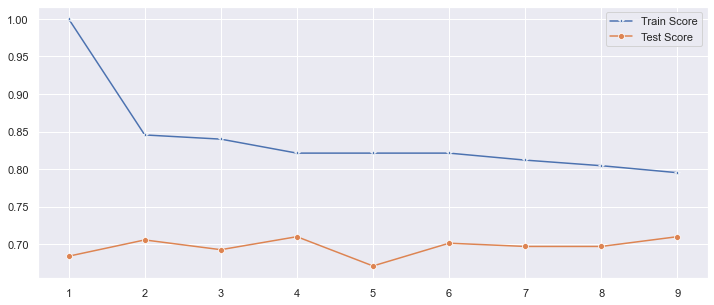

In [52]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores, marker='o', label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [53]:
print("According to the plot, the best number of neighbors will be 4")

According to the plot, the best number of neighbors will be 4


In [54]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred, labels=knn.classes_)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

"\nOR\nplt.figure(figsize=(5,5))\nsns.heatmap(pd.DataFrame(pl), annot=True, cmap='Blues')\nplt.show()\n"

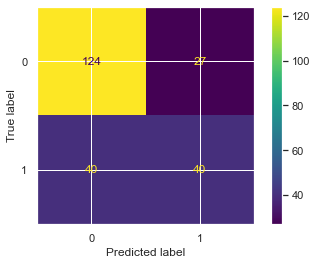

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=pl, display_labels=knn.classes_)
disp.plot() 

"""
OR
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(pl), annot=True, cmap='Blues')
plt.show()
"""

**<font color='teal'> Print the classification report </font>**

In [56]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.76      0.82      0.79       151
     class 1       0.60      0.50      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



#### Putting all together in a KNN pipeline

In [57]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Creating the pipeline: pipeline
pipeline = Pipeline(steps)

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

# Fitting the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiating and fitting a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7012987012987013
Accuracy without Scaling: 0.670995670995671


In [58]:
test_scores = []
train_scores = []

for i in range(1,10):
    # Pipeline
    steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=i))]
    pipeline = Pipeline(steps)
    knn_scaled = pipeline.fit(X_train, y_train)
    
    train_scores.append(knn_scaled.score(X_train, y_train))
    test_scores.append(knn_scaled.score(X_test, y_test))

In [59]:
[print('Iteration {}:\n Train Score = {}\n Test Score = {}\n'.format(i+1, train_scores[i], test_scores[i])) for i in range(0, 9)];

Iteration 1:
 Train Score = 1.0
 Test Score = 0.6666666666666666

Iteration 2:
 Train Score = 0.851024208566108
 Test Score = 0.670995670995671

Iteration 3:
 Train Score = 0.8547486033519553
 Test Score = 0.670995670995671

Iteration 4:
 Train Score = 0.8417132216014898
 Test Score = 0.6926406926406926

Iteration 5:
 Train Score = 0.839851024208566
 Test Score = 0.7012987012987013

Iteration 6:
 Train Score = 0.8230912476722533
 Test Score = 0.683982683982684

Iteration 7:
 Train Score = 0.8342644320297952
 Test Score = 0.7316017316017316

Iteration 8:
 Train Score = 0.8212290502793296
 Test Score = 0.7359307359307359

Iteration 9:
 Train Score = 0.8268156424581006
 Test Score = 0.7316017316017316



In [60]:
print('Number of Neighbors for the maximum score in the TRAINING dataset: {}'.format(train_scores.index(max(train_scores))+1))
print('Number of Neighbors for the maximum score in the TESTING dataset: {}'.format(test_scores.index(max(test_scores))+1))

Number of Neighbors for the maximum score in the TRAINING dataset: 1
Number of Neighbors for the maximum score in the TESTING dataset: 8


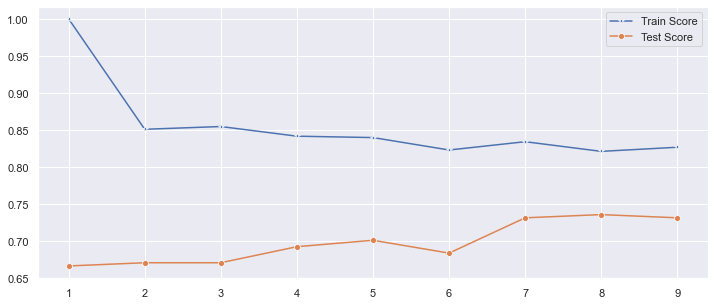

In [61]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10), y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=range(1,10), y=test_scores, marker='o', label='Test Score')

In [62]:
print("According to the plot, the best number of neighbors will be 8")

According to the plot, the best number of neighbors will be 8


In [63]:
# Pipeline with KNN model including 8 neighbors
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=8))]
pipeline = Pipeline(steps)
knn_scaled = pipeline.fit(X_train, y_train)

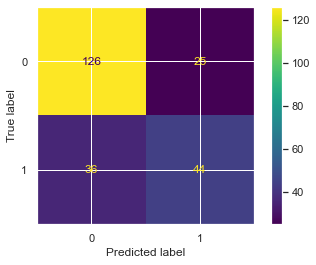

In [64]:
# Computing and plotting confusion matrix
y_pred = knn_scaled.predict(X_test)
pl = confusion_matrix(y_test, y_pred, labels=knn_scaled.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=pl, display_labels=knn_scaled.classes_)
disp.plot() 

In [65]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.78      0.83      0.81       151
     class 1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



##### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

##### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

#### Grid Search for KNN

In [66]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid, cv=5)
#knn_cv.fit(X, y) <----- Nothing wrong on using all data BUT there is no room for validation
knn_cv.fit(X_train, y_train) # <----- Nothing wrong on using all data BUT there is no room for validation

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

Print the best score and best parameter for n_neighbors.

In [67]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7541190723433713
Best Parameters: {'n_neighbors': 45}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

#### Grid Search for KNN (in Pipeline)

In [68]:
# KNN Pipeline
knn_pipe = Pipeline(steps=[("scaler", StandardScaler()), ('knn', KNeighborsClassifier())])

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

# Parameters of pipeline
knn_param_grid = {'knn__n_neighbors': np.arange(1, 50)}
knn_search = GridSearchCV(knn_pipe, knn_param_grid, n_jobs=-1)
knn_search.fit(X_train, y_train) 

# Printings
print("Best parameter (CV score=%0.3f):" % knn_search.best_score_)
print(knn_search.best_params_)

Best parameter (CV score=0.793):
{'knn__n_neighbors': 12}


Here we can see that the ideal number of n_neighbors for this model is 12 based on the grid search performed on the pipeline. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

#### Grid Search for Random Forest

Range of values for hyperparameters is proposed based on this [article.](https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1)

In [69]:
# Parameter grid for RF
rf_param_grid = {'n_estimators': np.arange(50,200,15),
                 'max_features': np.arange(0.1, 1, 0.1),
                 'max_depth': [3, 5, 7, 9],
                 'max_samples': [0.3, 0.5, 0.8]}

# Random Forest classifier
rf_model = RandomForestClassifier() 

# Cross validation using Grid Search
rf_cv= GridSearchCV(rf_model, rf_param_grid, cv=5)

# Fit the data
#rf_cv.fit(X, y)
rf_cv.fit(X_train, y_train)

# Printings
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7875908618899274
Best Parameters: {'max_depth': 7, 'max_features': 0.4, 'max_samples': 0.8, 'n_estimators': 95}


Here you can see that the ideal values for the following paramaters were computed for the Random Forest:

- 'n_estimators': 125
- 'max_features': 0.1
- 'max_depth': 5
- 'max_samples': 0.5

#### Grid Search for Random Forest (in Pipeline)

In [70]:
# Random Forest Pipeline
rf_pipe = Pipeline(steps=[("scaler", StandardScaler()), ('rf', RandomForestClassifier())])

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

# Parameters of pipeline for RF
rf_param_grid = {'rf__n_estimators': np.arange(50,200,15),
                 'rf__max_features': np.arange(0.1, 1, 0.1),
                 'rf__max_depth': [3, 5, 7, 9],
                 'rf__max_samples': [0.3, 0.5, 0.8]}

#rf_param_grid = {'rf__max_depth': np.arange(1, 10), 'rf__n_estimators': np.arange(1, 10)}
rf_search = GridSearchCV(rf_pipe, rf_param_grid, n_jobs=-1)
rf_search.fit(X_train, y_train)

# Printings
print("Best parameter (CV score=%0.3f):" % rf_search.best_score_)
print(rf_search.best_params_)

Best parameter (CV score=0.788):
{'rf__max_depth': 7, 'rf__max_features': 0.2, 'rf__max_samples': 0.3, 'rf__n_estimators': 155}


Here you can see that the ideal values for the following paramaters were computed for the Random Forest (in pipeline):

- 'n_estimators': 155
- 'max_features': 0.4
- 'max_depth': 7
- 'max_samples': 0.8